과대적합 문제 해결 : Dropout

- 특성이 많은 데이터
- 신경망층을 깊게 쌓은 경우
- epoch를 많이 하는 경우

In [3]:
import pandas as pd
# header = None : 특성이 없는 데이터의 경우 특성이름을 달아줌
sonar = pd.read_csv('sonar.csv',header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
#문제 데이터 , 정답데이터 나누기
X= sonar.iloc[:,:-1]
y=sonar.iloc[:,-1]

X.shape,y.shape

((208, 60), (208,))

In [7]:
# y의 클래스 수 
# 2개
y.unique()

array(['R', 'M'], dtype=object)

In [10]:
y = pd.get_dummies(y)
y.shape

(208, 2)

In [13]:
#train,test로 나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((156, 60), (52, 60), (156, 2), (52, 2))

In [14]:
import numpy as np
import tensorflow as tf

seed = 10
 
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1=Sequential()

# 입력층
model1.add(Dense(1000 , input_dim = 60 ,activation = 'relu'))

# 은닉층
model1.add(Dense(500,activation='relu'))
model1.add(Dense(250,activation='relu'))
model1.add(Dense(900,activation='relu'))
model1.add(Dense(60,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(15,activation='relu'))
#출력층
model1.add(Dense(2,activation='softmax'))

model1.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 489
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              61000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 900)               225900    
_________________________________________________________________
dense_4 (Dense)              (None, 60)                54060     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
________________________

In [17]:
model1.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
history1 = model1.fit(X_train,y_train,
                     epochs = 200, batch_size = 5,
                     validation_data=[X_test,y_test]) #과대적합인지 아닌지 확인해보기 위해서

Train on 156 samples, validate on 52 samples
Epoch 1/200
156/156 [==============================] - 1s 8ms/sample - loss: 0.6776 - accuracy: 0.5769 - val_loss: 0.8336 - val_accuracy: 0.5000
Epoch 2/200
156/156 [==============================] - 0s 550us/sample - loss: 0.6922 - accuracy: 0.5256 - val_loss: 0.6730 - val_accuracy: 0.5962
Epoch 3/200
156/156 [==============================] - 0s 535us/sample - loss: 0.6279 - accuracy: 0.6154 - val_loss: 0.8062 - val_accuracy: 0.5000
Epoch 4/200
156/156 [==============================] - 0s 535us/sample - loss: 0.5420 - accuracy: 0.6923 - val_loss: 0.3741 - val_accuracy: 0.8077
Epoch 5/200
156/156 [==============================] - 0s 534us/sample - loss: 0.5378 - accuracy: 0.7308 - val_loss: 0.4664 - val_accuracy: 0.7500
Epoch 6/200
156/156 [==============================] - 0s 531us/sample - loss: 0.4383 - accuracy: 0.7500 - val_loss: 0.3859 - val_accuracy: 0.8269
Epoch 7/200
156/156 [==============================] - 0s 539us/sample - lo

156/156 [==============================] - 0s 511us/sample - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.4273 - val_accuracy: 0.7885
Epoch 57/200
156/156 [==============================] - 0s 499us/sample - loss: 0.0348 - accuracy: 0.9808 - val_loss: 1.4662 - val_accuracy: 0.8077
Epoch 58/200
156/156 [==============================] - 0s 556us/sample - loss: 0.0101 - accuracy: 0.9936 - val_loss: 1.8665 - val_accuracy: 0.8269
Epoch 59/200
156/156 [==============================] - 0s 499us/sample - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.1833 - val_accuracy: 0.8269
Epoch 60/200
156/156 [==============================] - 0s 505us/sample - loss: 1.3082e-04 - accuracy: 1.0000 - val_loss: 2.3222 - val_accuracy: 0.8269
Epoch 61/200
156/156 [==============================] - 0s 500us/sample - loss: 8.2722e-05 - accuracy: 1.0000 - val_loss: 2.4151 - val_accuracy: 0.8269
Epoch 62/200
156/156 [==============================] - 0s 499us/sample - loss: 5.3115e-05 - accuracy: 1.0000 - val_l

156/156 [==============================] - 0s 487us/sample - loss: 1.4595e-07 - accuracy: 1.0000 - val_loss: 4.3232 - val_accuracy: 0.8269
Epoch 111/200
156/156 [==============================] - 0s 507us/sample - loss: 1.4213e-07 - accuracy: 1.0000 - val_loss: 4.3352 - val_accuracy: 0.8269
Epoch 112/200
156/156 [==============================] - 0s 492us/sample - loss: 1.3678e-07 - accuracy: 1.0000 - val_loss: 4.3464 - val_accuracy: 0.8269
Epoch 113/200
156/156 [==============================] - 0s 499us/sample - loss: 1.3220e-07 - accuracy: 1.0000 - val_loss: 4.3584 - val_accuracy: 0.8269
Epoch 114/200
156/156 [==============================] - 0s 497us/sample - loss: 1.2761e-07 - accuracy: 1.0000 - val_loss: 4.3687 - val_accuracy: 0.8269
Epoch 115/200
156/156 [==============================] - 0s 496us/sample - loss: 1.2150e-07 - accuracy: 1.0000 - val_loss: 4.3810 - val_accuracy: 0.8269
Epoch 116/200
156/156 [==============================] - 0s 511us/sample - loss: 1.1692e-07 - ac

156/156 [==============================] - 0s 492us/sample - loss: 2.2925e-08 - accuracy: 1.0000 - val_loss: 5.1652 - val_accuracy: 0.8269
Epoch 164/200
156/156 [==============================] - 0s 500us/sample - loss: 2.1397e-08 - accuracy: 1.0000 - val_loss: 5.1771 - val_accuracy: 0.8269
Epoch 165/200
156/156 [==============================] - 0s 505us/sample - loss: 2.0632e-08 - accuracy: 1.0000 - val_loss: 5.1905 - val_accuracy: 0.8269
Epoch 166/200
156/156 [==============================] - 0s 508us/sample - loss: 2.0632e-08 - accuracy: 1.0000 - val_loss: 5.2003 - val_accuracy: 0.8269
Epoch 167/200
156/156 [==============================] - 0s 482us/sample - loss: 2.0632e-08 - accuracy: 1.0000 - val_loss: 5.2114 - val_accuracy: 0.8269
Epoch 168/200
156/156 [==============================] - 0s 499us/sample - loss: 2.0632e-08 - accuracy: 1.0000 - val_loss: 5.2227 - val_accuracy: 0.8269
Epoch 169/200
156/156 [==============================] - 0s 505us/sample - loss: 2.0632e-08 - ac

In [19]:
print('훈련점수 : ',model1.evaluate(X_train,y_train))
print('테스트점수 : ',model1.evaluate(X_test,y_test))

156/156 [==============================] - 0s 89us/sample - loss: 9.9341e-09 - accuracy: 1.0000
훈련점수 :  [9.934106096136766e-09, 1.0]
52/52 [==============================] - 0s 153us/sample - loss: 5.5078 - accuracy: 0.8269
테스트점수 :  [5.5078361217792215, 0.8269231]


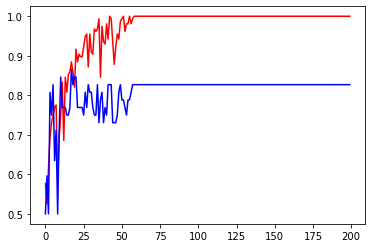

In [21]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

acc_len = np.arange(len(acc))#X축에 개수를 알아야함

plt.plot(acc_len,acc,c = 'red')
plt.plot(acc_len,val_acc,c='blue')

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model2=Sequential()

# 입력층
model2.add(Dense(1000 , input_dim = 60 ,activation = 'relu'))
model2.add(Dropout(0.5)) #0.5는 사용하고 0.5는 없애겠다. 과대적합을 줄일 수 있음
# 은닉층
model2.add(Dense(500,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(250,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(900,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(60,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(30,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(15,activation='relu'))
model2.add(Dropout(0.5))
#출력층
model2.add(Dense(2,activation='softmax'))

model2.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 491
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              61000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
________________________

In [23]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history2 = model2.fit(X_train,y_train,
                     epochs = 200, batch_size=5,
                     validation_data=[X_test,y_test])

Train on 156 samples, validate on 52 samples
Epoch 1/200
156/156 [==============================] - 1s 5ms/sample - loss: 0.8059 - accuracy: 0.4423 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/200
156/156 [==============================] - 0s 608us/sample - loss: 0.7175 - accuracy: 0.4936 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/200
156/156 [==============================] - 0s 597us/sample - loss: 0.7150 - accuracy: 0.4936 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/200
156/156 [==============================] - 0s 562us/sample - loss: 0.7265 - accuracy: 0.4679 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/200
156/156 [==============================] - 0s 582us/sample - loss: 0.7063 - accuracy: 0.5449 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/200
156/156 [==============================] - 0s 595us/sample - loss: 0.7164 - accuracy: 0.4744 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/200
156/156 [==============================] - 0s 571us/sample - lo

156/156 [==============================] - 0s 537us/sample - loss: 0.5627 - accuracy: 0.7436 - val_loss: 0.5186 - val_accuracy: 0.7308
Epoch 57/200
156/156 [==============================] - 0s 575us/sample - loss: 0.5605 - accuracy: 0.6795 - val_loss: 0.5176 - val_accuracy: 0.8077
Epoch 58/200
156/156 [==============================] - 0s 639us/sample - loss: 0.5469 - accuracy: 0.7372 - val_loss: 0.5026 - val_accuracy: 0.7885
Epoch 59/200
156/156 [==============================] - 0s 601us/sample - loss: 0.5319 - accuracy: 0.6731 - val_loss: 0.5211 - val_accuracy: 0.7115
Epoch 60/200
156/156 [==============================] - 0s 522us/sample - loss: 0.4874 - accuracy: 0.7372 - val_loss: 0.5701 - val_accuracy: 0.8846
Epoch 61/200
156/156 [==============================] - 0s 543us/sample - loss: 0.5360 - accuracy: 0.7372 - val_loss: 0.5681 - val_accuracy: 0.8654
Epoch 62/200
156/156 [==============================] - 0s 595us/sample - loss: 0.5763 - accuracy: 0.6667 - val_loss: 0.6057 

156/156 [==============================] - 0s 528us/sample - loss: 0.3395 - accuracy: 0.8077 - val_loss: 0.6166 - val_accuracy: 0.8269
Epoch 112/200
156/156 [==============================] - 0s 536us/sample - loss: 0.3978 - accuracy: 0.8269 - val_loss: 0.5861 - val_accuracy: 0.8077
Epoch 113/200
156/156 [==============================] - 0s 543us/sample - loss: 0.3915 - accuracy: 0.7885 - val_loss: 0.5005 - val_accuracy: 0.7692
Epoch 114/200
156/156 [==============================] - 0s 671us/sample - loss: 0.3535 - accuracy: 0.8269 - val_loss: 0.4978 - val_accuracy: 0.7500
Epoch 115/200
156/156 [==============================] - 0s 665us/sample - loss: 0.4048 - accuracy: 0.8077 - val_loss: 0.4791 - val_accuracy: 0.7692
Epoch 116/200
156/156 [==============================] - 0s 563us/sample - loss: 0.4264 - accuracy: 0.8462 - val_loss: 0.4978 - val_accuracy: 0.7500
Epoch 117/200
156/156 [==============================] - 0s 540us/sample - loss: 0.3562 - accuracy: 0.8269 - val_loss: 0

156/156 [==============================] - 0s 658us/sample - loss: 0.2592 - accuracy: 0.8718 - val_loss: 0.5413 - val_accuracy: 0.7500
Epoch 167/200
156/156 [==============================] - 0s 601us/sample - loss: 0.2865 - accuracy: 0.8590 - val_loss: 0.6377 - val_accuracy: 0.8077
Epoch 168/200
156/156 [==============================] - 0s 537us/sample - loss: 0.2617 - accuracy: 0.8718 - val_loss: 0.6683 - val_accuracy: 0.7308
Epoch 169/200
156/156 [==============================] - 0s 550us/sample - loss: 0.3348 - accuracy: 0.8526 - val_loss: 0.9734 - val_accuracy: 0.8077
Epoch 170/200
156/156 [==============================] - 0s 537us/sample - loss: 0.3245 - accuracy: 0.8397 - val_loss: 0.7226 - val_accuracy: 0.7308
Epoch 171/200
156/156 [==============================] - 0s 546us/sample - loss: 0.2657 - accuracy: 0.8590 - val_loss: 0.6979 - val_accuracy: 0.8077
Epoch 172/200
156/156 [==============================] - 0s 550us/sample - loss: 0.2128 - accuracy: 0.9038 - val_loss: 0

In [26]:
print('훈련점수 :' , model2.evaluate(X_train,y_train))
print('테스트점수:' ,model2.evaluate(X_test,y_test))

156/156 [==============================] - 0s 163us/sample - loss: 0.1262 - accuracy: 0.9295
훈련점수 : [0.12617701874711576, 0.92948717]
52/52 [==============================] - 0s 114us/sample - loss: 1.1183 - accuracy: 0.8269
테스트점수: [1.118250168286837, 0.8269231]


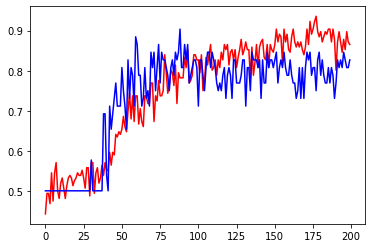

In [25]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

acc_len = np.arange(len(acc))#X축에 개수를 알아야함

plt.plot(acc_len,acc,c = 'red')
plt.plot(acc_len,val_acc,c='blue')

In [ ]:
#modelcheckpoint ,ealrystopping사용하면 최적의 점수를 찾을 수 있음

In [29]:
print('훈련점수 :' , model1.evaluate(X_train,y_train))
print('테스트점수:' ,model1.evaluate(X_test,y_test))

156/156 [==============================] - 0s 90us/sample - loss: 9.9341e-09 - accuracy: 1.0000
훈련점수 : [9.934106096136766e-09, 1.0]
52/52 [==============================] - 0s 134us/sample - loss: 5.5078 - accuracy: 0.8269
테스트점수: [5.5078361217792215, 0.8269231]


In [30]:
print('훈련점수 :' , model2.evaluate(X_train,y_train))
print('테스트점수:' ,model2.evaluate(X_test,y_test))

156/156 [==============================] - 0s 102us/sample - loss: 0.1262 - accuracy: 0.9295
훈련점수 : [0.12617701874711576, 0.92948717]
52/52 [==============================] - 0s 153us/sample - loss: 1.1183 - accuracy: 0.8269
테스트점수: [1.118250168286837, 0.8269231]
